In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.array([
    [10.00,  4,  9],
    [1.00,  2,  6],
    [9.00,  1,  6],
    [2.00,  5,  3],
    [6.00,  1,  1],
    [13.00,  1,  1],
    [8.00,  2,  2],
    [4.00,  3,  7],
    [2.00,  7,  5]]
)

In [3]:
x_min, x_max = data[:, 1].min(), data[:, 1].max()
y_min, y_max = data[:, 2].min(), data[:, 2].max()

corners = [
    [0, x_min, y_min],
    [0, x_min, y_max],
    [0, x_max, y_min],
    [0, x_max, y_max],
]

data2 = np.append(data, corners, axis=0)
corners

[[0, 1.0, 1.0], [0, 1.0, 9.0], [0, 7.0, 1.0], [0, 7.0, 9.0]]

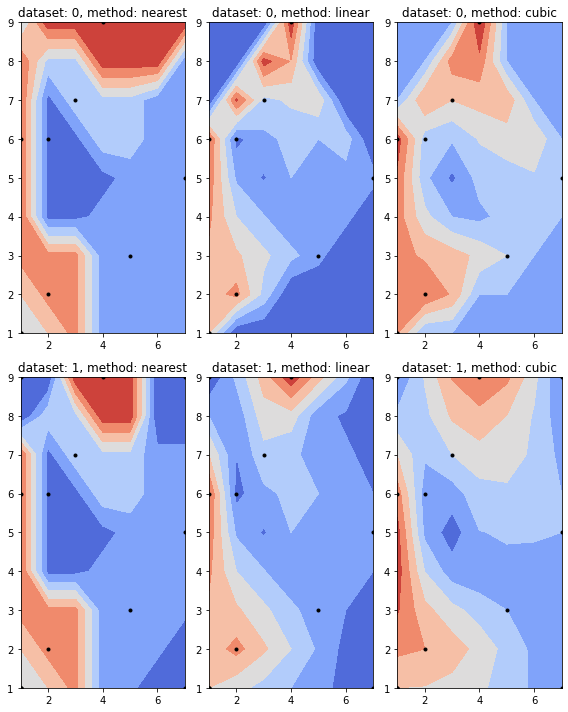

In [15]:
x = np.linspace(int(x_min), int(x_max), int(x_max - x_min + 1))
y = np.linspace(int(y_min), int(y_max), int(y_max - y_min + 1))
X, Y = np.meshgrid(x,y)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,10))
for j, d in enumerate((data, data2)):
    points = d[:, 1:3]
    values = d[:, 0]
    for i, method in enumerate(('nearest', 'linear', 'cubic')):
        Ti = griddata(points, values, (X, Y), method=method, fill_value=0)
        c = i % 3
        ax[j, c].contourf(X, Y, Ti, cmap=plt.cm.coolwarm)
        ax[j, c].set_title("dataset: {}, method: {}".format(j, method))
        ax[j, c].scatter(points[:, 0], points[:, 1], c='k', marker='.')

plt.tight_layout()
plt.show()

In [16]:
x = np.linspace(int(x_min), int(x_max), int(x_max - x_min + 1))
y = np.linspace(int(y_min), int(y_max), int(y_max - y_min + 1))

points = data2[:, 1:3]
values = data2[:, 0]
mtx = griddata(points, values, (X, Y), method="cubic", fill_value=0)
df = pd.DataFrame(mtx)

print("Matrix shape:", df.shape)
print("Matrix max:", df.values.max())
print("Matrix max:", df.values.min())
print("Any NaNs:", df.isnull().values.any())

Matrix shape: (9, 7)
Matrix max: 11.006373337107108
Matrix max: -1.1002673606568092
Any NaNs: False


## Plotly

In [17]:
import plotly.graph_objects as go

In [18]:
fig = go.Figure(data=[go.Surface(z=df.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()

In [212]:
fig.write_html("plot.html")